Mutual Information Scores:
Number_of_words                                    1.138377
Number_of_letters                                  1.036988
Number_of_total_vocabulary                         1.013669
Number_of_easy_vocabulary                          0.710864
Number_of_nouns                                    0.545951
Total_duration_of_saccade                          0.255119
Total_duration_of_Visit                            0.243118
Number_of_fixations                                0.226900
Total_duration_of_fixations                        0.155546
Number_of_regression                               0.145869
Ratio_of_difficult_kanji                           0.106152
Total_duration_of_saccade_per_letters              0.091902
Interest                                           0.079058
Cosine_similarity_to_previous_sentence             0.074050
Minimum_duration_of_fixations                      0.070374
Percentage_of_katakana (nouns+verbs)               0.063924
Maximum_durat

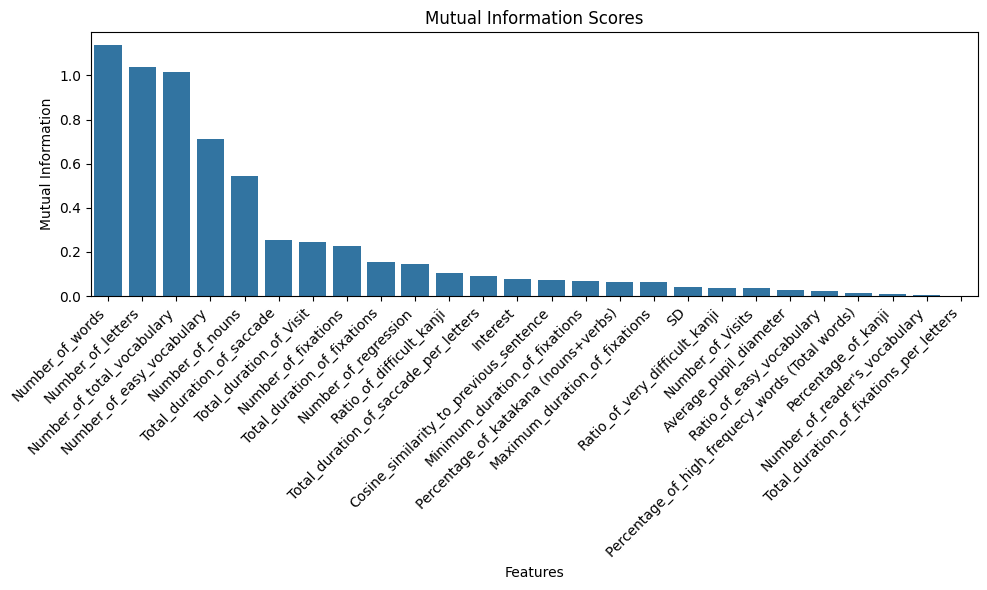

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Calculate Mutual Information
def calculate_mi(data):
    # Assume the last column is the target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

# Visualize Mutual Information
def visualize_mi(mi_scores):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mi_scores.index, y=mi_scores.values)
    plt.title("Mutual Information Scores")
    plt.xlabel("Features")
    plt.ylabel("Mutual Information")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Replace 'your_data.csv' with the actual path to your CSV file
    #file_path = "E:\実験\データセット\データセット2/2.次元圧縮後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    file_path = "E:\実験\データセット\データセット2/1.欠損値処理後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    
    # Load data
    data = load_data(file_path)
    
    # Calculate Mutual Information
    mi_scores = calculate_mi(data)
    
    # Display results
    print("Mutual Information Scores:")
    print(mi_scores)
    
    # Visualize results
    visualize_mi(mi_scores)

if __name__ == "__main__":
    main()

Mutual Information Scores (Target: SD):
Interest                                           0.357274
Average_pupil_diameter                             0.142658
Number_of_reader's_vocabulary                      0.142576
PCA_2                                              0.103276
Percentage_of_kanji                                0.082710
Total_duration_of_saccade                          0.073748
Percentage_of_high_frequecy_words (Total words)    0.052983
Percentage_of_katakana (nouns+verbs)               0.050288
Minimum_duration_of_fixations                      0.047157
MLMScoring                                         0.041254
PCA_1                                              0.038649
Ratio_of_easy_vocabulary                           0.036386
Number_of_Visits                                   0.026385
Number_of_regression                               0.023286
Cosine_similarity_to_previous_sentence             0.020828
Ratio_of_difficult_kanji                           0.003181


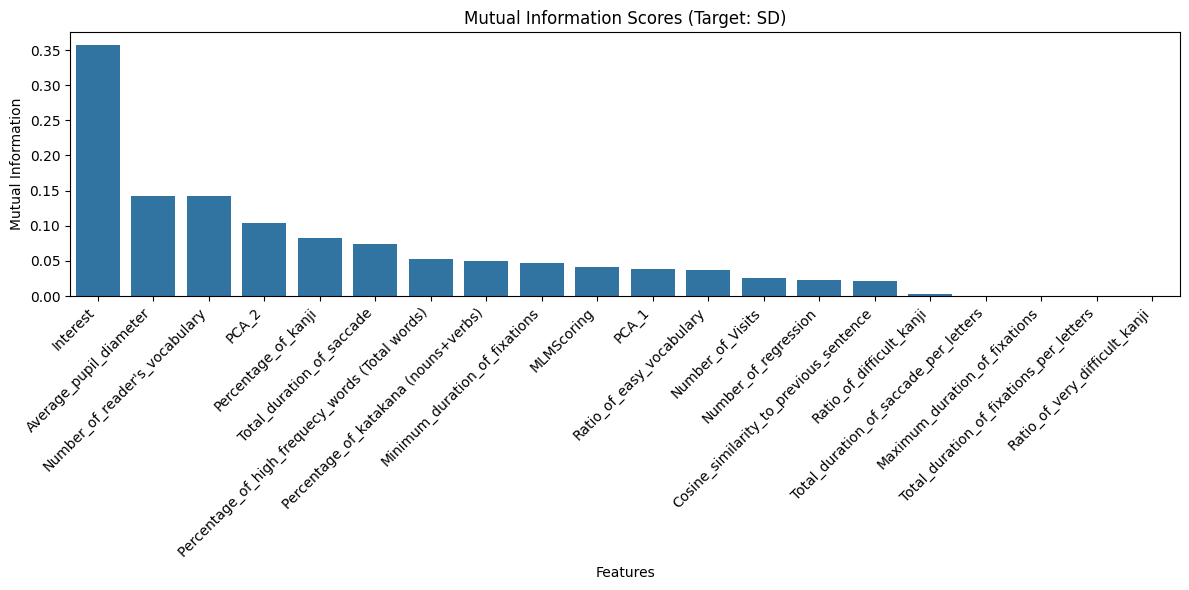

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Calculate Mutual Information
def calculate_mi(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

# Visualize Mutual Information
def visualize_mi(mi_scores, target_column):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=mi_scores.index, y=mi_scores.values)
    plt.title(f"Mutual Information Scores (Target: {target_column})")
    plt.xlabel("Features")
    plt.ylabel("Mutual Information")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Replace 'your_data.csv' with the actual path to your CSV file
    file_path = "E:\実験\データセット\データセット2/2.次元圧縮後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    #file_path = "E:\実験\データセット\データセット2/1.欠損値処理後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    target_column = 'SD'
    
    # Load data
    data = load_data(file_path)
    
    # Calculate Mutual Information
    mi_scores = calculate_mi(data, target_column)
    
    # Display results
    print(f"Mutual Information Scores (Target: {target_column}):")
    print(mi_scores)
    
    # Visualize results
    visualize_mi(mi_scores, target_column)

if __name__ == "__main__":
    main()

TypeError: Image data of dtype object cannot be converted to float

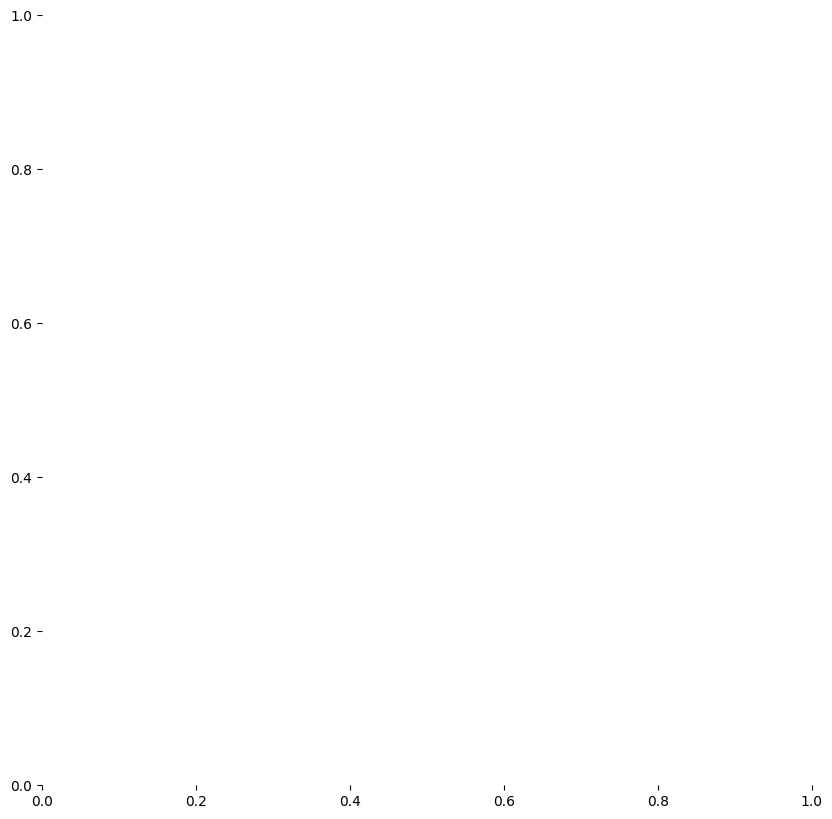

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    return pd.read_csv(file_path)

def calculate_mi_matrix(data):
    mi_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
    
    for col1 in data.columns:
        for col2 in data.columns:
            if col1 == col2:
                mi_matrix.loc[col1, col2] = 1.0
            else:
                mi = mutual_info_regression(data[col1].values.reshape(-1, 1), data[col2])[0]
                mi_matrix.loc[col1, col2] = mi
                mi_matrix.loc[col2, col1] = mi
    
    return mi_matrix

def visualize_mi_matrix(mi_matrix):
    plt.figure(figsize=(12, 10))
    sns.heatmap(mi_matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1, square=True)
    plt.title("Mutual Information Matrix")
    plt.tight_layout()
    plt.show()

def calculate_mi_with_target(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

def visualize_mi_scores(mi_scores, target_column):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=mi_scores.index, y=mi_scores.values)
    plt.title(f"Mutual Information Scores (Target: {target_column})")
    plt.xlabel("Features")
    plt.ylabel("Mutual Information")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def main():
    file_path = "E:\実験\データセット\データセット2/2.次元圧縮後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    #file_path = "E:\実験\データセット\データセット2/1.欠損値処理後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    target_column = 'SD'
    
    data = load_data(file_path)
    
    # Calculate and visualize MI matrix
    mi_matrix = calculate_mi_matrix(data)
    visualize_mi_matrix(mi_matrix)
    
    # Calculate and visualize MI scores with target
    mi_scores = calculate_mi_with_target(data, target_column)
    print(f"Mutual Information Scores (Target: {target_column}):")
    print(mi_scores)
    visualize_mi_scores(mi_scores, target_column)

if __name__ == "__main__":
    main()

Original data shape: (416, 21)

Data types:
SD                                                 float64
Interest                                           float64
Number_of_reader's_vocabulary                        int64
Total_duration_of_fixations_per_letters            float64
Minimum_duration_of_fixations                        int64
Maximum_duration_of_fixations                        int64
Total_duration_of_saccade                            int64
Total_duration_of_saccade_per_letters              float64
PCA_1                                              float64
Average_pupil_diameter                             float64
Number_of_Visits                                     int64
Number_of_regression                                 int64
PCA_2                                              float64
Ratio_of_easy_vocabulary                           float64
Percentage_of_katakana (nouns+verbs)               float64
Percentage_of_high_frequecy_words (Total words)    float64
Percentage_o

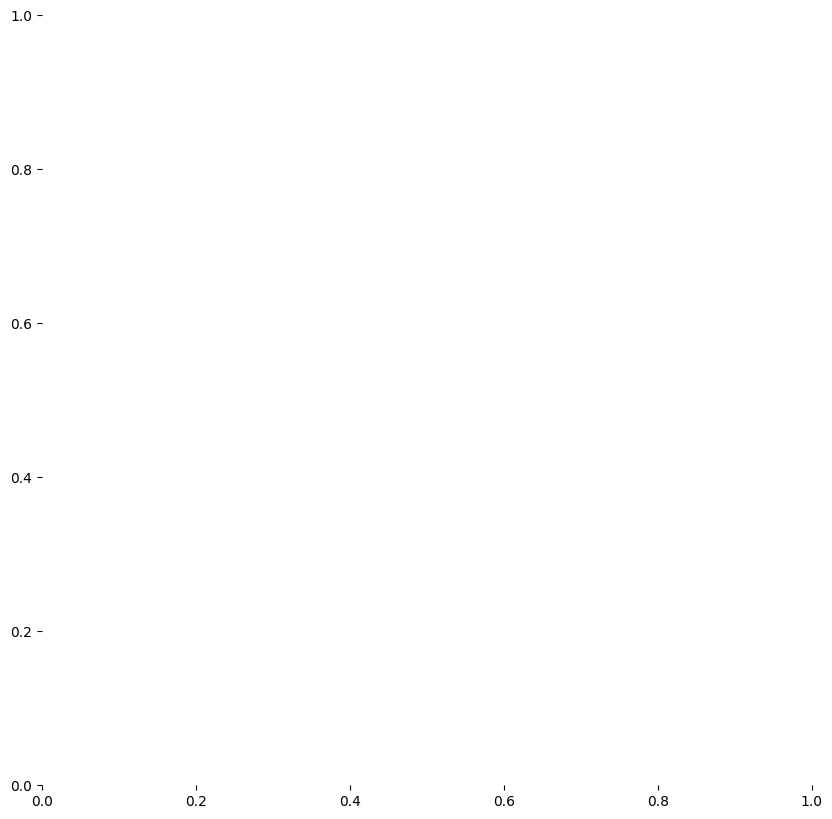

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

def check_data_types(data):
    non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_columns) > 0:
        print("Warning: The following columns are not numeric:")
        for col in non_numeric_columns:
            print(f"- {col}: {data[col].dtype}")
        print("These columns will be excluded from the Mutual Information calculation.")
    return data.select_dtypes(include=[np.number])

def calculate_mi_matrix(data):
    mi_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
    
    for col1 in data.columns:
        for col2 in data.columns:
            if col1 == col2:
                mi_matrix.loc[col1, col2] = 1.0
            else:
                mi = mutual_info_regression(data[col1].values.reshape(-1, 1), data[col2])[0]
                mi_matrix.loc[col1, col2] = mi
                mi_matrix.loc[col2, col1] = mi
    
    return mi_matrix

def visualize_mi_matrix(mi_matrix):
    plt.figure(figsize=(12, 10))
    sns.heatmap(mi_matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1, square=True)
    plt.title("Mutual Information Matrix")
    plt.tight_layout()
    plt.show()

def calculate_mi_with_target(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

def visualize_mi_scores(mi_scores, target_column):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=mi_scores.index, y=mi_scores.values)
    plt.title(f"Mutual Information Scores (Target: {target_column})")
    plt.xlabel("Features")
    plt.ylabel("Mutual Information")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def main():
    file_path = "E:\実験\データセット\データセット2/2.次元圧縮後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    #file_path = "E:\実験\データセット\データセット2/1.欠損値処理後\データセット（視線情報+やさにちチェッカー+意味情報）.csv"
    target_column = 'SD'
    
    try:
        # Load data
        data = load_data(file_path)
        
        # Check and clean data
        print("Original data shape:", data.shape)
        print("\nData types:")
        print(data.dtypes)
        
        numeric_data = check_data_types(data)
        print("\nNumeric data shape:", numeric_data.shape)
        
        if target_column not in numeric_data.columns:
            raise ValueError(f"Target column '{target_column}' is not numeric or not present in the data.")
        
        # Calculate and visualize MI matrix
        mi_matrix = calculate_mi_matrix(numeric_data)
        visualize_mi_matrix(mi_matrix)
        
        # Calculate and visualize MI scores with target
        mi_scores = calculate_mi_with_target(numeric_data, target_column)
        print(f"\nMutual Information Scores (Target: {target_column}):")
        print(mi_scores)
        visualize_mi_scores(mi_scores, target_column)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("\nPlease check your data and ensure all columns used for MI calculation are numeric.")

if __name__ == "__main__":
    main()

c:\WorkSpace\Practice\env2\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\WorkSpace\Practice\env2\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\WorkSpace\Practice\env2\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\WorkSpace\Practice\env2\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, U

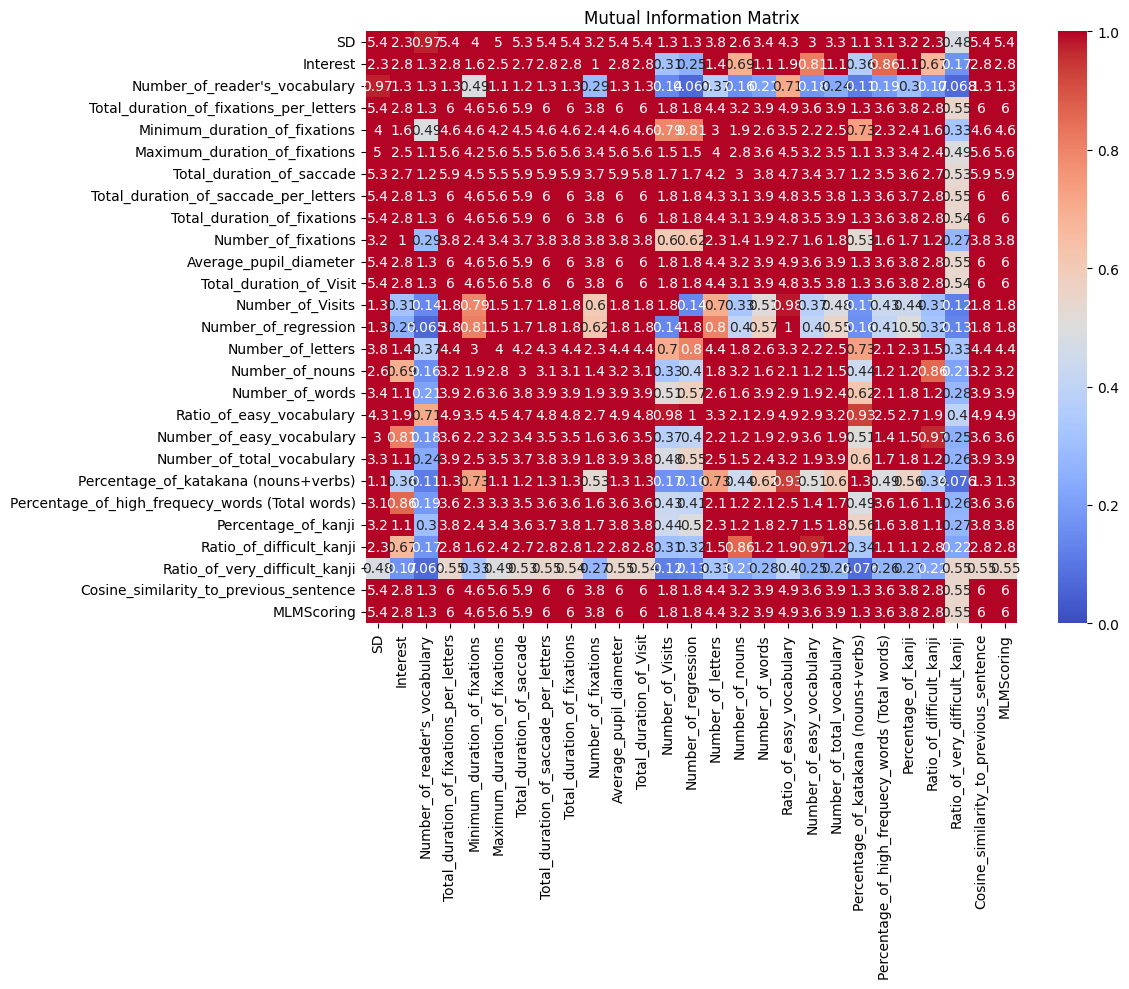

                                                       SD  Interest  \
SD                                               5.429162  2.320517   
Interest                                         2.320517  2.846212   
Number_of_reader's_vocabulary                    0.973218  1.316004   
Total_duration_of_fixations_per_letters          5.429162  2.846212   
Minimum_duration_of_fixations                    4.020224  1.566863   
Maximum_duration_of_fixations                    5.041652  2.495359   
Total_duration_of_saccade                        5.270602  2.710979   
Total_duration_of_saccade_per_letters            5.379756  2.813468   
Total_duration_of_fixations                      5.415832  2.839547   
Number_of_fixations                              3.224006  1.007270   
Average_pupil_diameter                           5.429162  2.846212   
Total_duration_of_Visit                          5.402502  2.822885   
Number_of_Visits                                 1.345424  0.312963   
Number

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
#df = pd.read_csv("E:\実験\データセット\データセット2/2.次元圧縮後\データセット（視線情報+やさにちチェッカー+意味情報）.csv")
df = pd.read_csv("E:\実験\データセット\データセット2/1.5 標準化後\データセット（視線情報+やさにちチェッカー+意味情報）.csv")


# Calculate the number of features
n_features = df.shape[1]

# Initialize the MI matrix
mi_matrix = np.zeros((n_features, n_features))

# Calculate mutual information for each pair of features
for i in range(n_features):
    for j in range(n_features):
        mi_matrix[i, j] = mutual_info_score(df.iloc[:, i], df.iloc[:, j])

# Create a DataFrame from the MI matrix
mi_df = pd.DataFrame(mi_matrix, index=df.columns, columns=df.columns)

# Plot the MI matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(mi_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Mutual Information Matrix')
plt.tight_layout()
plt.show()

# Print the MI matrix
print(mi_df)